# 정형 데이터 전처리 2
- 앞서 진행하여 추출한 bank-prep.csv 파일로 진행
- 앞서 진행한 정형 데이터 전처리의 경우 지도학습(Decision Tree)를 활용했다면, 이번에는 비지도학습을 활용

## 1. 데이터 특성 이해  
### 데이터 읽기 및 확인

In [1]:
import pandas as pd

bank_df = pd.read_csv('bank-prep.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
print(bank_df.shape)
print(bank_df.dtypes)

(6933, 32)
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unknown      int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


### 데이터 정규화  
- 데이터 정규화를 통해 서로 다른 변수들 간에 비교가 가능해짐
- 다양한 정규화 방법이 있지만, 본 프로젝트에서는 범위변환과 Z변환 수행

In [5]:
from sklearn.preprocessing import MinMaxScaler

bank_df = bank_df.drop('y', axis=1)

mc = MinMaxScaler()
mc.fit(bank_df)

bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns = bank_df.columns)
bank_df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


- 결과를 통해 범위변환(MinMaxScaler) 결과(0.0~1.0)를 확인할 수 있음

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


- 결과를 통해 Z변환(StandardScaler) 결과를 확인할 수 있음

In [10]:
print(bank_df_sc.mean(), bank_df_sc.std())

age         -3.085501e-16
default     -2.955983e-15
balance      8.058845e-17
housing      1.263524e-14
loan        -6.665694e-15
day         -1.745907e-15
duration     5.929837e-17
campaign     4.521945e-15
pdays        2.224701e-14
previous     1.160586e-15
divorced     1.641971e-15
married     -1.653693e-15
single      -1.133763e-15
primary     -2.040037e-15
secondary    2.141291e-15
tertiary     1.623955e-15
cellular     7.350275e-15
telephone    9.604558e-15
unknown     -3.957336e-14
apr         -3.182223e-16
aug         -7.228092e-15
dec          1.448650e-15
feb         -1.088728e-14
jan         -9.445567e-15
jul          1.463856e-14
jun         -6.843317e-15
mar         -2.591381e-15
may          9.057037e-15
nov          6.118989e-15
oct         -1.769291e-14
sep         -6.114746e-15
dtype: float64 age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pda

- 각 변수의 평균과 표준편차 값 확인 결과, 평균은 '0', 표준편차는 '1'에 가까운 값을 가진다는 것을 알 수 있음

## 2. 데이터의 그룹화
- 비지도학습 알고리즘을 사용하여 그룹화(군집화) 진행
- 군집화 방법에는 계층형, 비계층형 방법이 있음
- 군집은 데이터 간의 거리에 따라 형성됨
- 대표적인 거리 함수는 3가지로 유클리드거리, 맨하튼 거리, 코사인 유사도가 있음

### 계층형 클러스터링
- 계층형 클러스터링(Hierarchical Clustering)은 거리가 가까운 데이터부터 순서대로 군집화함
- 그룹화의 결과는 덴드로그램(Dendrogram)으로 표현됨
- 데이터 병합 방법으로 워드법(Ward's Method)가 있음

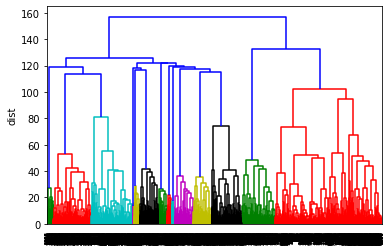

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

hcls = linkage(bank_df_sc, metric='euclidean', method='ward')
dendrogram(hcls)

plt.ylabel('dist')
plt.show()

- 결과를 통해 가로축(고객), 세로축(거리)를 가진 덴드로그램을 확인할 수 있음

In [14]:
from scipy.cluster.hierarchy import fcluster

cst_group = fcluster(hcls, 100, criterion='distance')
print(cst_group)

[14 14 14 ... 12 12 12]


- 각 고객의 클러스터 ID가 배열 형식으로 표시되는 것을 확인할 수 있음
- 이 결과는 새로운 특징량으로 사용이 가능함

### 비계층형 클러스터링
- 대표적인 비계층형 클러스터링 방법으로 K-Means 알고리즘이 있음
- 파라미터인 K개를 기준으로 군집화를 수행함

In [15]:
from sklearn.cluster import KMeans

kcls = KMeans(n_clusters=10)
cst_group = kcls.fit_predict(bank_df_sc)

print(cst_group)

[1 1 1 ... 5 5 5]


- 결과를 통해 각 고객의 군집 ID가 배열로 출력되는 것을 확인할 수 있음

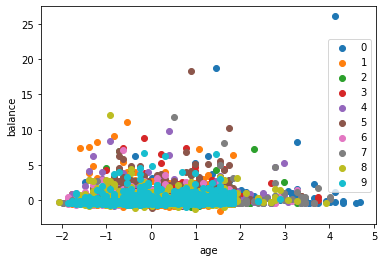

In [16]:
for i in range(10):
    labels = bank_df_sc[cst_group == i]
    plt.scatter(labels['age'], labels['balance'], label=i)
    
plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

- 군집 ID는 새로운 특징량으로 사용할 수 있기 때문에, 기존 데이터 셋과 결합

In [17]:
bank_df_sc['group'] = cst_group
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,1


In [19]:
# 각 그룹의 데이터 건수 확인
print(bank_df_sc['group'].value_counts())
bank_df_sc[bank_df_sc['group']==0].describe()

1    1673
8    1017
3     865
9     737
5     568
4     560
6     538
0     430
2     421
7     124
Name: group, dtype: int64


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,4.300000e+02,430.000000,430.0
mean,0.677185,-0.085322,0.158177,-0.249245,-0.024769,0.081138,-0.054573,0.191959,0.017132,-0.040119,...,0.104432,0.089654,0.373052,-0.284778,0.087164,-0.328660,0.264164,-1.349488e-01,0.098041,0.0
std,1.269409,0.619033,1.787639,1.002994,0.978215,1.066255,1.130432,1.050896,1.005687,0.702674,...,1.163705,1.231271,1.249163,0.457948,1.362845,0.783985,1.293951,4.723944e-16,1.363275,0.0
min,-1.774271,-0.137148,-0.635194,-1.140627,-0.444540,-1.758049,-0.957063,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-0.112073,0.0
25%,-0.348363,-0.137148,-0.414149,-1.140627,-0.444540,-0.792715,-0.702677,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-0.112073,0.0
50%,0.697303,-0.137148,-0.265072,-1.140627,-0.444540,0.172620,-0.370020,-0.238367,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.434730,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-0.112073,0.0
75%,1.457787,-0.137148,0.145766,0.876711,-0.444540,0.775954,0.104273,0.433285,-0.418664,-0.310149,...,-0.267818,-0.167406,2.300280,-0.351657,-0.100262,-0.662104,-0.320275,-1.349488e-01,-0.112073,0.0
max,4.689845,7.291369,26.055019,0.876711,2.249514,1.861955,9.054343,6.142329,4.170989,6.200873,...,3.733873,5.973486,2.300280,2.843677,9.973879,1.510337,3.122313,-1.349488e-01,8.922795,0.0


- 클러스터 ID 0의 통계량을 확인할 수 있음

## 3. 잠재적인 요구 추출  
### 주성분 분석이란?
- 주성분 분석(PCA, Principal Component Analysis)는 데이터의 산란 정도(분산)에 주목해 분산이 최대가 되는 방향으로 새로운 축(제1주성분)을 설정함
- 그리고 나서, 분산이 두 번째로 커지는 방향으로, 제1주성분에 직교하도록 제2주성분을 설정함
- 이와 같이 반복하여 누적기여율(Cumulative Proportion)이 70~80%에 도달할 때까지 주성분을 추출함
- 여기서 기여율이란, 각 주성분이 가지고 있는 정보가 데이터에 대해서 어느 정도 방향을 미치는지를 나타내는 지수임
- PCA는 기존의 변수를 조합해 다른 변수를 새롭게 작성하는 등의 처리를 함

In [22]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
bank_df_pca = pca.fit_transform(bank_df_sc)

print(pca.n_components_)
print(bank_df_pca.shape)

16
(6933, 16)


- 주성분 수는 16개, 데이터는 총 6,933개, 16열로 축소된 것을 확인할 수 있음

In [23]:
y = pd.read_csv('bank-prep.csv', sep=',')['y']

bank_df_pca=pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y

print(bank_df_pca.shape)

(6933, 17)


- PCA를 적용한 데이터 셋에 목적변수 y를 추가

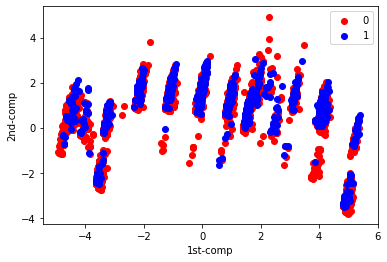

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y', axis=1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0)

bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis=1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1)

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.show()

- 결과를 통해 제1, 2 주성분의 분포를 확인할 수 있음